In [1]:
import numpy as np
from numpy import log2
from scipy import signal
import matplotlib.pyplot as plt

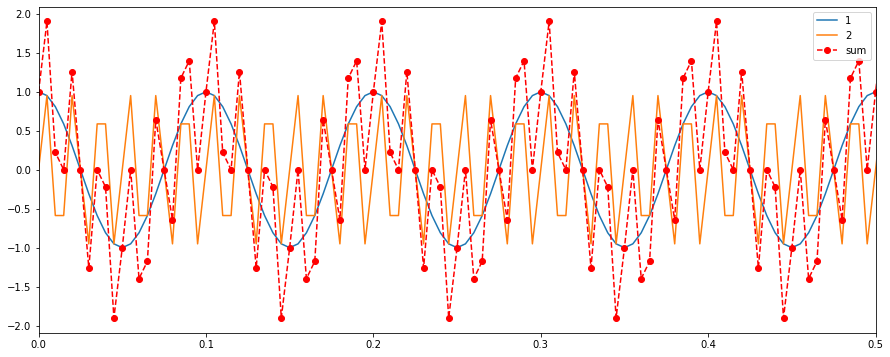

In [2]:
sample_rate = 200
nsamples = 400
freq_camp = sample_rate/nsamples
t = np.arange(nsamples) / sample_rate
y1 = np.cos(2*np.pi*10*t)  # 10/400 = 0.025
y2 = np.sin(2*np.pi*60*t)  # 60/400 = 0.15 > 0.1

plt.figure(figsize=(15,6))
plt.plot(t,y1,label='1')
plt.plot(t,y2,label='2')
plt.plot(t,y2+y1,'r--o',label='sum')
plt.xlim(0,0.5)
plt.legend()

plt.show()

In [3]:
numtaps = 6
f = 0.03             #cut-off freq
taps= signal.firwin(numtaps, f)

print('coeff_1 = ', taps)


coeff_1 =  [0.02856076 0.14288273 0.32855651 0.32855651 0.14288273 0.02856076]


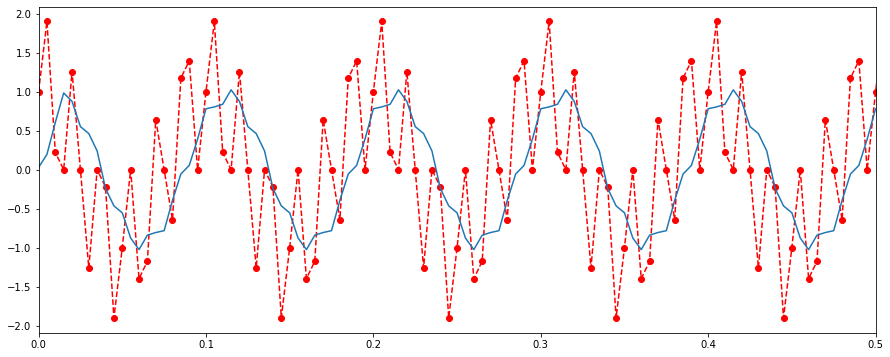

In [4]:
filtered_y = signal.lfilter(taps, 1, y1+y2)

plt.figure(figsize=(15,6))
plt.plot(t,y2+y1,'r--o',label='sum')
plt.plot(t,filtered_y )
plt.xlim(0,0.5)

plt.show()

In [6]:
def computeQ(y,taps):
    M = max(max(np.abs(taps)),max(np.abs(y)))
    Q = log2(127) - log2(M)
    return Q

def double_to_signed(a, Q):
    int_a = np.round(a*2**Q)
    signed = np.where(int_a >= 0, int_a, int_a + 256).astype(int)
    return signed
    
def signed_to_double(a,Q):
    signed = np.where(a >= 128, a-256, a)
    double_a = signed*2**(-Q)
    return double_a
    

In [140]:
#data = np.arange(-1,1,0.2)
#data = np.append(data,[-1/200, 1.2])
#print('data',data)

#Q = computeQ(np.array([0]),data)
#print('Q =',Q)
#print('signed', double_to_signed(data,Q))

In [141]:
#signed_to_double(double_to_signed(data,Q),Q)

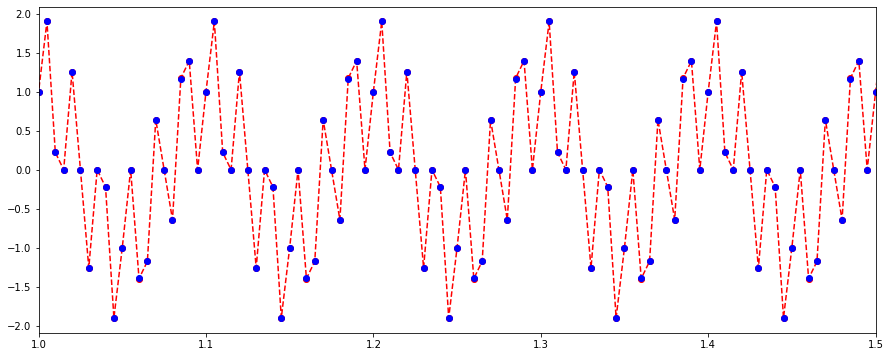

In [7]:
y = y1 + y2
Q = computeQ(y, taps)
signed = double_to_signed(y,Q)
double = signed_to_double(signed,Q)

plt.figure(figsize=(15,6))
plt.plot(t,y, 'r--o')
plt.plot(t,double, 'bo')
plt.xlim(1,1.5)
plt.show()

In [9]:
Q = computeQ(y, taps)
integer_taps = double_to_signed(taps, Q)
print([bin(i) for i in integer_taps])

['0b10', '0b1010', '0b10110', '0b10110', '0b1010', '0b10']


In [9]:
#interface
import serial

ser = serial.Serial('/dev/ttyUSB5', baudrate=115200)

filtered_signal_int = []
for i in signed:
    ser.write(chr(i))
    filtered_signal_int.append(ser.read())

filtered_signal = signed_to_double(np.array(filtered_signal_int),Q)

ModuleNotFoundError: No module named 'serial'

In [ ]:
np.savetxt("signal.txt")

## Attempt for studying the approximation done

0.00393700787401563 -0.00393700787401563
0.00393700787401563 2.220446049250313e-16


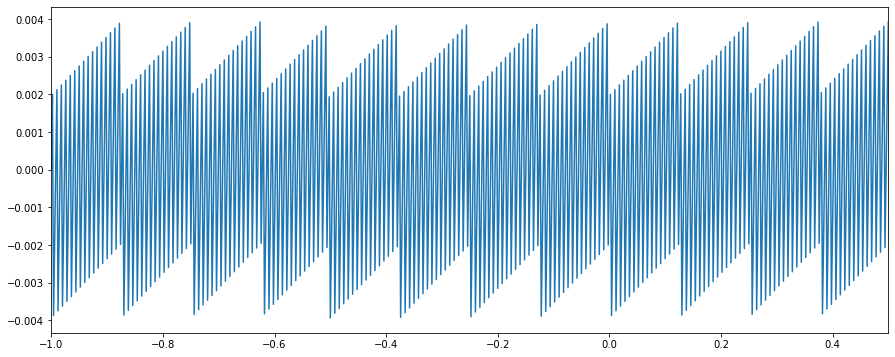

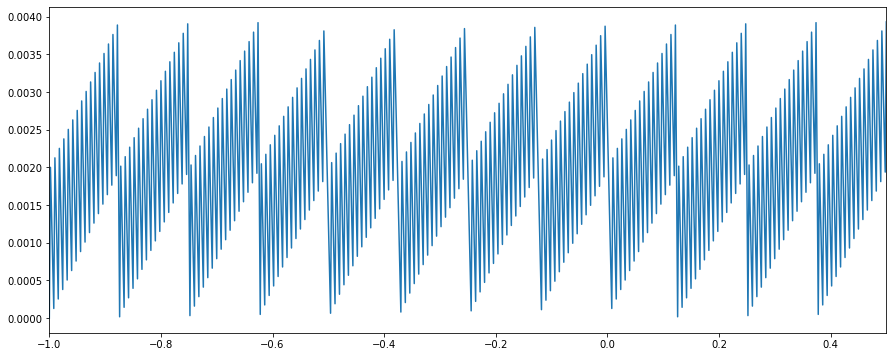

In [43]:
series = np.linspace(-1, 1, 1001)
Q = computeQ(series, taps)
transformed = signed_to_double(double_to_signed(series, Q), Q)
plt.figure(figsize=(15,6))
plt.plot(series, series-transformed)
plt.xlim(-1, 0.5)

discrepancy = series - transformed
print(max(discrepancy), min(discrepancy))

disc_pos = discrepancy[discrepancy > 0]
plt.figure(figsize=(15,6))
plt.plot(series[discrepancy > 0], disc_pos)
plt.xlim(-1, 0.5)
print(max(disc_pos), min(disc_pos))